# Oscillators

This example shows how to generate different signals using the Oscillator module. This module integrates basic structures  that implements a simple interface compatible with the [std::generate](https://en.cppreference.com/w/cpp/algorithm/generate) standard function.

 *eDSP* implements 4 different oscillators:
 
 - Square Signal
 - Triangular Signal
 - Sawtooth Signal
 - Sinusoidal Signal

All of them are available by default in the `oscillators` folder.

## Square Signal

The square wave can be constructed from straight line segments. The square waves contain a wide range of harmonics. It can be defined as simply the sign function of a sinusoid:

$$ x(t) = {sgn}\left(\sin {\frac {t}{T}}\right)={sgn}\left(\sin ft\right)$$

which will be 1 when the sinusoid is positive, −1 when the sinusoid is negative, and 0 at the discontinuities. Here, T is the period of the square wave, or equivalently, f is its frequency, where f = 1/T.

The class `square_oscillator` implements a basic square signal oscillator. In this example we generate a square signal with a period of 10KHz sampled at 42.1KHz:

In [1]:
import pedsp.oscillator as oscillator
import pedsp.algorithm as algorithm
import matplotlib.pyplot as plt
import numpy as np

amplitude = 1.;
sample_rate = 8000;
frequency = 5;
duration_secs = 2;
samples = int(duration_secs * sample_rate); 
duty = 0.5;

square = oscillator.Square(amp=amplitude, sr=sample_rate, f=frequency, duty=duty)
data = square.generate(N=samples)

Then we can display the final result:

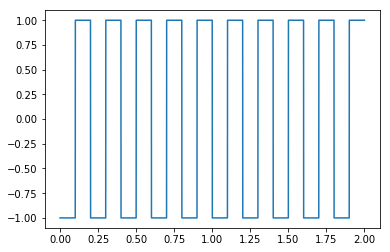

In [2]:
t = algorithm.linspace(0, duration_secs, samples)
plt.plot(t, data)
plt.show()

## Sawtooth Signal

A sawtooth waveform increases linearly from -1 to 1 in $ [0, 2  \pi  wi] $ interval, and decreases linearly from 1 to
-1 in the interval $ \left[ 2  \pi  w, 2  \pi \right] $, where $ w $ is the width of the periodic signal. 
 If $ w $ is 0.5, the function generates a standard triangular wave. The triangle wave shares many geometric
similarities with the sawtooth wave, except it has two sloping line segments.

A more general form, and with period T, is:

$$ {\displaystyle 2\left({\frac {t}{T}}-\left\lfloor {\frac {1}{2}}+{\frac {t}{T}}\right\rfloor \right)} $$


The class `sawtooth_oscillator` implements a basic square signal oscillator. In this example we generate a square signal with a period of 10KHz sampled at 42.1KHz:

In [3]:
width = 0.7
sawtooth = oscillator.Sawtooth(amp=amplitude, sr=sample_rate, f=frequency, width=width)
data = sawtooth.generate(N=samples)

Then, to display:

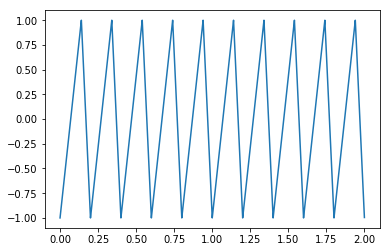

In [4]:
plt.plot(t, data)
plt.show()

### Interactive mode

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact(dtype=widgets.Dropdown(
                options=['square', 'sinusoidal', 'sawtooth'],
                value='square',
                description='Type:',
                disabled=False), 
          frequency=widgets.IntSlider(min=1,max=20,step=1,value=10), 
          duration=widgets.IntSlider(min=1,max=5,step=1,value=1),
          alpha=widgets.FloatSlider(min=0.0,max=1.0, value=0.3))
def display_oscillator(dtype, frequency, duration, alpha):
    sr = 42000
    g = None
    if dtype == "square":
        g = oscillator.Square(amp=1, sr=sr, f=frequency, duty=alpha)
    elif dtype == "sinusoidal":
        g = oscillator.Sinusoidal(amp=1, sr=sr, f=frequency, p=0)
    else:
        g = oscillator.Sawtooth(amp=1, sr=sr, f=frequency, width=alpha)
   
    samples = int(duration * sr)
    data = g.generate(N=samples)
    t = algorithm.linspace(0, duration, samples)
    plt.plot(t, data)
    plt.show()
    

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnVHlwZTonLCBvcHRpb25zPSgnc3F1YXJlJywgJ3NpbnVzb2lkYWwnLCAnc2F3dG9vdGgnKSwgdmFsdWU9J3NxdWHigKY=
